Total job listings: 750

Top 5 locations:
Location
London, England                        445
Remote                                  42
Manchester, England                     32
Cambridge, East of England, England     20
Bristol, England                        17
Name: count, dtype: int64

Salary Analysis:
Average salary range: £55.09K - £75.66K
Highest offered salary: £300.00K
Lowest offered salary: £12.00K

Top 10 most common skills:
Machine learning: 306
SQL: 180
TensorFlow: 167
R: 147
Azure: 128
Data science: 103
Python: 94
AWS: 87
Communication skills: 81
Google Cloud Platform: 81

Average company rating: 3.85
Highest rated company: HMGCC (5.0)
Lowest rated company: Medialab Group (1.7)

Top 5 job titles:
Job Title
Data Scientist                      67
Senior Data Scientist               36
Machine Learning Engineer           23
Senior Machine Learning Engineer    11
Lead Data Scientist                 10
Name: count, dtype: int64


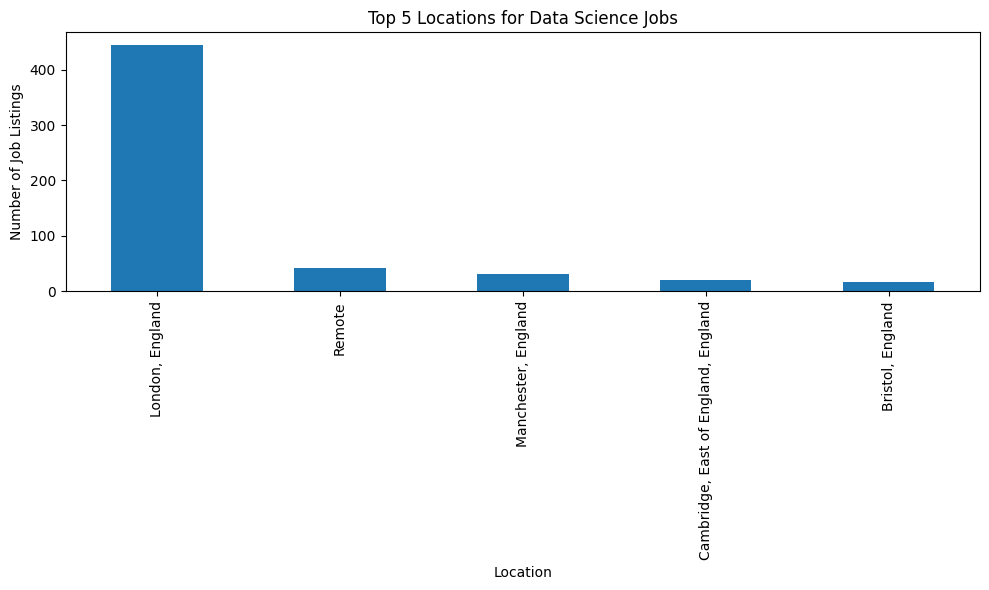

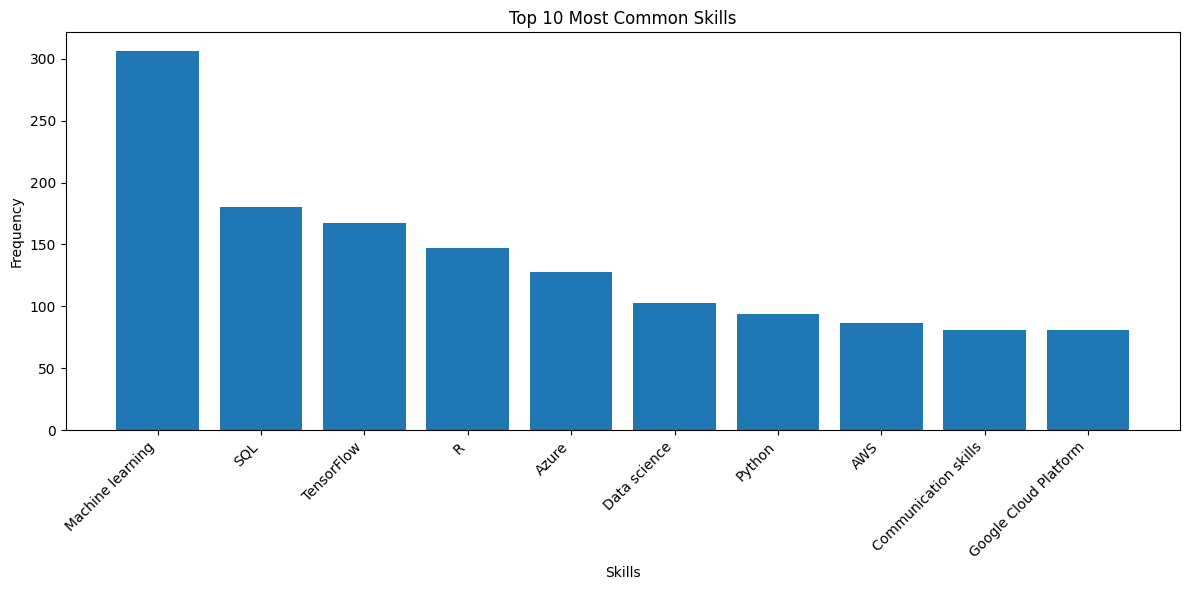

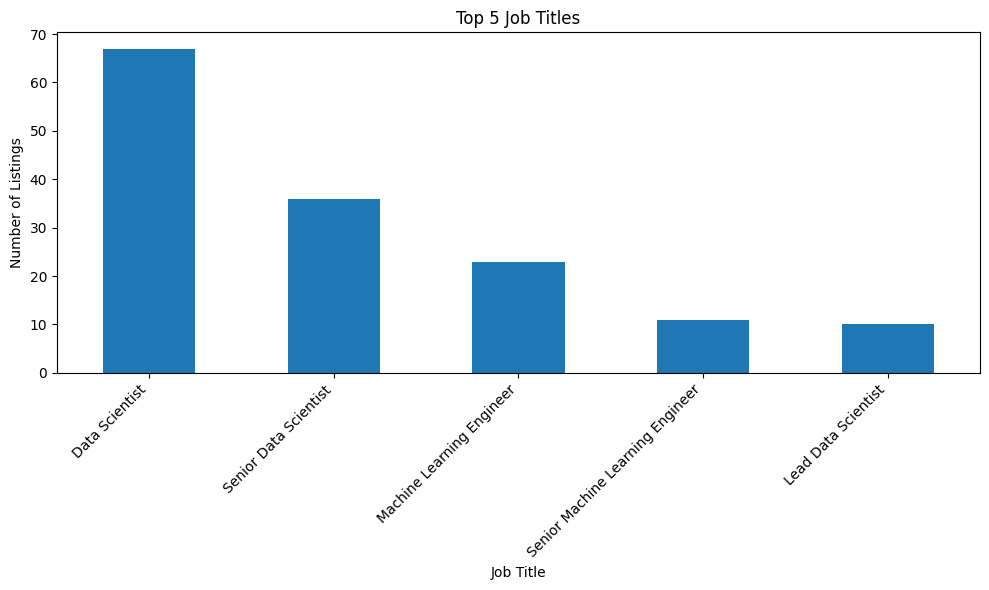

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Read the CSV file
df = pd.read_csv('Raw_Dataset.csv')

# 1. Total number of job listings
print(f"Total job listings: {len(df)}")

# 2. Location analysis
location_counts = df['Location'].value_counts().head()
print("\nTop 5 locations:")
print(location_counts)

# Visualize location data
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Top 5 Locations for Data Science Jobs')
plt.xlabel('Location')
plt.ylabel('Number of Job Listings')
plt.tight_layout()
plt.savefig('top_locations.png')

# 3. Salary analysis
if 'Salary' in df.columns:
    def extract_salary(salary_str):
        import re
        if pd.isna(salary_str):
            return None, None
        salary_str = str(salary_str)
        numbers = re.findall(r'\d+(?:\.\d+)?', salary_str)
        if len(numbers) == 1:
            return float(numbers[0]), float(numbers[0])
        elif len(numbers) >= 2:
            return float(numbers[0]), float(numbers[-1])
        else:
            return None, None

    df['Salary_Lower'], df['Salary_Upper'] = zip(*df['Salary'].apply(extract_salary))

    avg_lower = df['Salary_Lower'].mean()
    avg_upper = df['Salary_Upper'].mean()

    print("\nSalary Analysis:")
    if pd.notna(avg_lower) and pd.notna(avg_upper):
        print(f"Average salary range: £{avg_lower:.2f}K - £{avg_upper:.2f}K")
    else:
        print("Unable to calculate average salary range due to insufficient data.")

    max_salary = df['Salary_Upper'].max()
    min_salary = df['Salary_Lower'].min()

    if pd.notna(max_salary):
        print(f"Highest offered salary: £{max_salary:.2f}K")
    else:
        print("Unable to determine highest offered salary.")

    if pd.notna(min_salary):
        print(f"Lowest offered salary: £{min_salary:.2f}K")
    else:
        print("Unable to determine lowest offered salary.")
else:
    print("\nSalary Analysis: 'Salary' column not found in the dataset.")

# 4. Most common skills
if 'Skills' in df.columns:
    all_skills = ', '.join(df['Skills'].dropna()).split(', ')
    top_skills = Counter(all_skills).most_common(10)

    print("\nTop 10 most common skills:")
    for skill, count in top_skills:
        print(f"{skill}: {count}")

    # Visualize skills data
    plt.figure(figsize=(12, 6))
    skills, counts = zip(*top_skills)
    plt.bar(skills, counts)
    plt.title('Top 10 Most Common Skills')
    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_skills.png')
else:
    print("\nSkills Analysis: 'Skills' column not found in the dataset.")

# 5. Company ratings
if 'Company Score' in df.columns:
    avg_rating = df['Company Score'].mean()
    top_company = df.loc[df['Company Score'].idxmax()]
    bottom_company = df.loc[df['Company Score'].idxmin()]

    print(f"\nAverage company rating: {avg_rating:.2f}")
    print(f"Highest rated company: {top_company['Company']} ({top_company['Company Score']})")
    print(f"Lowest rated company: {bottom_company['Company']} ({bottom_company['Company Score']})")
else:
    print("\nCompany Rating Analysis: 'Company Score' column not found in the dataset.")

# 6. Job titles
if 'Job Title' in df.columns:
    job_title_counts = df['Job Title'].value_counts().head()
    print("\nTop 5 job titles:")
    print(job_title_counts)

    # Visualize job titles data
    plt.figure(figsize=(10, 6))
    job_title_counts.plot(kind='bar')
    plt.title('Top 5 Job Titles')
    plt.xlabel('Job Title')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_job_titles.png')
else:
    print("\nJob Title Analysis: 'Job Title' column not found in the dataset.")

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import randint, uniform
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Carregar os dados
df = pd.read_csv('Raw_Dataset.csv')

# Função para extrair salário
def extract_salary(salary_str):
    import re
    if pd.isna(salary_str):
        return None
    salary_str = str(salary_str)
    numbers = re.findall(r'\d+(?:\.\d+)?', salary_str)
    if numbers:
        return float(numbers[0])
    return None

# Engenharia de características
df['Salary_Value'] = df['Salary'].apply(extract_salary)
df = df.dropna(subset=['Salary_Value'])

# Remover outliers
Q1 = df['Salary_Value'].quantile(0.25)
Q3 = df['Salary_Value'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary_Value'] >= Q1 - 1.5 * IQR) & (df['Salary_Value'] <= Q3 + 1.5 * IQR)]

# Criar faixas salariais (3 classes)
df['Salary_Class'] = pd.qcut(df['Salary_Value'], q=3, labels=['Low', 'Medium', 'High'])

# Função melhorada para extrair anos de experiência
def extract_years_experience(text):
    if pd.isna(text):
        return 0
    words = word_tokenize(text.lower())
    for i, word in enumerate(words):
        if word == 'years' and i > 0:
            try:
                return int(words[i-1])
            except ValueError:
                pass
    return 0

df['Years_Experience'] = df['Skills'].apply(extract_years_experience)
df['Skills_Count'] = df['Skills'].str.count(',').fillna(0) + 1

# Extrair senioridade do título do trabalho
def extract_seniority(title):
    title = str(title).lower()
    if 'senior' in title or 'sr' in title or 'lead' in title or 'principal' in title:
        return 'Senior'
    elif 'junior' in title or 'jr' in title:
        return 'Junior'
    elif 'director' in title or 'head' in title or 'chief' in title:
        return 'Executive'
    else:
        return 'Mid'

df['Seniority'] = df['Job Title'].apply(extract_seniority)

# Preencher valores ausentes
df['Company Score'] = df['Company Score'].fillna(df['Company Score'].median())
df['Skills'] = df['Skills'].fillna('')

# Extrair cidade da localização
df['City'] = df['Location'].apply(lambda x: str(x).split(',')[0].strip())

# Novas características
df['Skills_YearsExp_Ratio'] = df['Skills_Count'] / (df['Years_Experience'] + 1)
df['Seniority_Score'] = df['Seniority'].map({'Junior': 1, 'Mid': 2, 'Senior': 3, 'Executive': 4})

# Selecionar características relevantes
X = df[['Job Title', 'City', 'Skills', 'Company Score', 'Years_Experience', 'Skills_Count', 'Seniority', 'Skills_YearsExp_Ratio', 'Seniority_Score']]
y = df['Salary_Class']

# Aplicar LabelEncoder às classes
le = LabelEncoder()
y = le.fit_transform(y)

# Custom transformer para criar características de interação
class InteractionFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['Seniority_YearsExp'] = X_['Seniority_Score'] * X_['Years_Experience']
        X_['Skills_CompanyScore'] = X_['Skills_Count'] * X_['Company Score']
        return X_

# Custom transformer para extração de características do texto
class TextFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_ = X.copy()
        X_['Skills_Processed'] = X_['Skills'].apply(self._process_text)
        return X_
    
    def _process_text(self, text):
        tokens = word_tokenize(text.lower())
        return ' '.join([word for word in tokens if word not in self.stop_words])

# Pré-processamento
numeric_features = ['Company Score', 'Years_Experience', 'Skills_Count', 'Skills_YearsExp_Ratio', 'Seniority_Score']
categorical_features = ['Job Title', 'City', 'Seniority']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

text_transformer = Pipeline([
    ('extractor', TextFeatureExtractor()),
    ('tfidf', TfidfVectorizer(max_features=100, stop_words='english'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'Skills')
    ])

# Criar pipeline com SMOTE
def create_pipeline(classifier):
    return ImbPipeline([
        ('interaction', InteractionFeatures()),
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(f_classif, k=min(100, X.shape[1] - 1))),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar modelos
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42)

models = {
    'RandomForest': create_pipeline(rf_model),
    'GradientBoosting': create_pipeline(gb_model),
    'XGBoost': create_pipeline(xgb_model),
    'LightGBM': create_pipeline(lgb_model)
}

# Definir espaço de hiperparâmetros
param_distributions = {
    'RandomForest': {
        'classifier__n_estimators': randint(100, 500),
        'classifier__max_depth': randint(5, 30),
        'classifier__min_samples_split': randint(2, 20),
        'classifier__min_samples_leaf': randint(1, 10)
    },
    'GradientBoosting': {
        'classifier__n_estimators': randint(100, 500),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__max_depth': randint(3, 10)
    },
    'XGBoost': {
        'classifier__n_estimators': randint(100, 500),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__max_depth': randint(3, 10)
    },
    'LightGBM': {
        'classifier__n_estimators': randint(100, 500),
        'classifier__learning_rate': uniform(0.01, 0.3),
        'classifier__max_depth': randint(3, 10)
    }
}

# Realizar busca aleatória e validação cruzada para cada modelo
results = {}
for name, model in models.items():
    print(f"\nOtimizando {name}...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(model, param_distributions[name], n_iter=50, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    results[name] = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'test_score': random_search.score(X_test, y_test)
    }

# Imprimir resultados
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best cross-validation score: {result['best_score']:.4f}")
    print(f"Test score: {result['test_score']:.4f}")

# Selecionar o melhor modelo
best_model_name = max(results, key=lambda x: results[x]['test_score'])
best_model = models[best_model_name].set_params(**results[best_model_name]['best_params'])
best_model.fit(X_train, y_train)

# Fazer previsões
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Avaliar o modelo
print("\nMelhor modelo:", best_model_name)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score (OvR): {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")

# Matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Análise de características importantes (para RandomForest)
if best_model_name == 'RandomForest':
    feature_names = (
        numeric_features +
        best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist() +
        best_model.named_steps['preprocessor'].named_transformers_['text'].named_steps['tfidf'].get_feature_names_out().tolist()
    )
    
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_importance = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    
    print("\nCaracterísticas mais importantes:")
    for feature, importance in sorted_features[:20]:
        print(f"{feature}: {importance:.4f}")
    
    plt.figure(figsize=(12, 8))
    plt.bar(range(20), [imp for _, imp in sorted_features[:20]])
    plt.xticks(range(20), [feat for feat, _ in sorted_features[:20]], rotation=90, ha='right')
    plt.title('Top 20 Características Mais Importantes')
    plt.xlabel('Características')
    plt.ylabel('Importância')
    plt.tight_layout()
    plt.show()

# Exemplo de previsão para um novo trabalho
new_job = pd.DataFrame({
    'Job Title': ['Senior Data Scientist'],
    'City': ['New York'],
    'Skills': ['Python, Machine Learning, SQL, 5 years experience'],
    'Company Score': [4.2],
    'Years_Experience': [5],
    'Skills_Count': [3],
    'Seniority': ['Senior'],
    'Skills_YearsExp_Ratio': [3/5],
    'Seniority_Score': [3]
})

new_job_pred = le.inverse_transform(best_model.predict(new_job))
new_job_pred_proba = best_model.predict_proba(new_job)
print(f"\nPredicted Salary Class for new job: {new_job_pred[0]}")
print(f"Probability of each class: {dict(zip(le.classes_, new_job_pred_proba[0]))}")

# Análise de erros
errors = X_test[y_test != y_pred].copy()
errors['Predicted'] = le.inverse_transform(y_pred[y_test != y_pred])
errors['Actual'] = le.inverse_transform(y_test[y_test != y_pred])
print("\nExemplos de previsões incorretas:")
print(errors.head())

# Distribuição das características
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Company Score', 'Years_Experience', 'Skills_Count', 'Skills_YearsExp_Ratio', 'Seniority_Score']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Salary_Class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'